In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, scale #This is to fit it
from sklearn.decomposition import PCA #This will allow us to do the PCA efficiently
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, classification_report, roc_auc_score, confusion_matrix
from scipy.special import expit # this is the logistic sigmoid function

np.random.seed(10058032)


In [42]:
def root_mean_squared_error(y_true, y_pred):

    return mean_squared_error(y_true, y_pred, squared=False)

In [17]:
#data = np.genfromtxt('spotify52kData.csv', delimiter=',', dtype=None, encoding=None)
#print(data) #Load Data

In [18]:
# Load the data using Pandas dataframe.
data_df = pd.read_csv('spotify52kData.csv')

Question 1

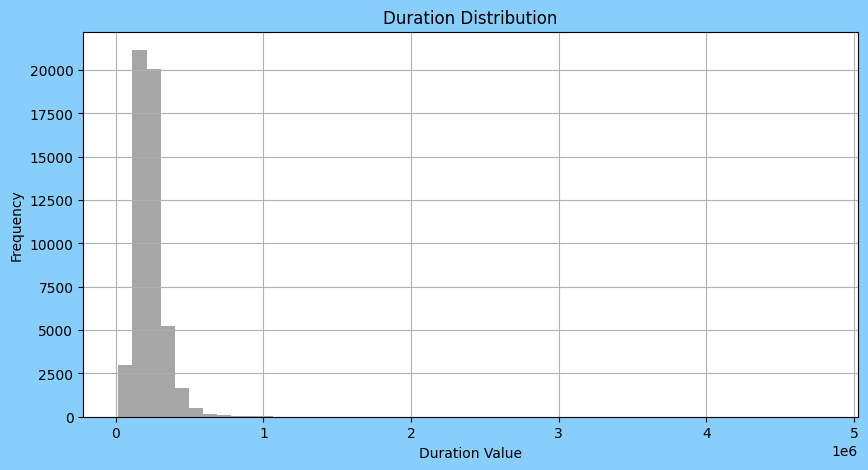

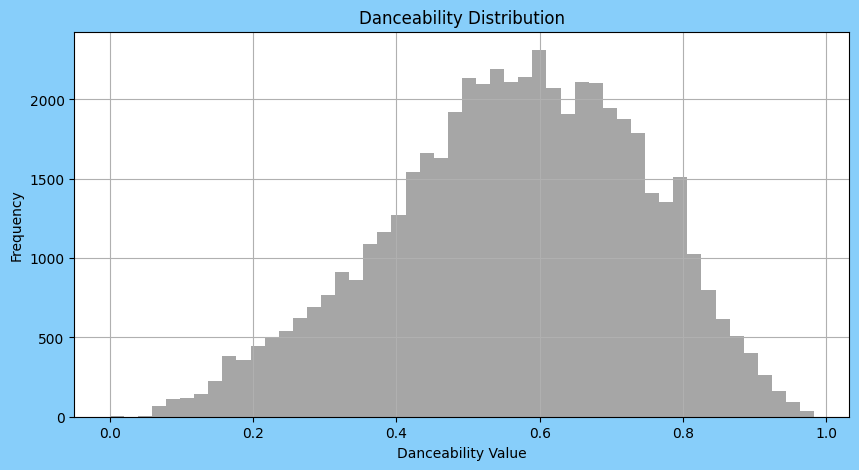

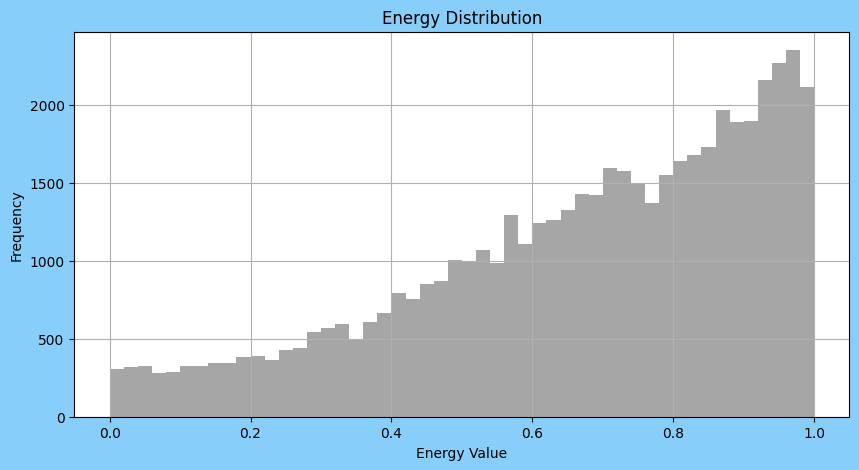

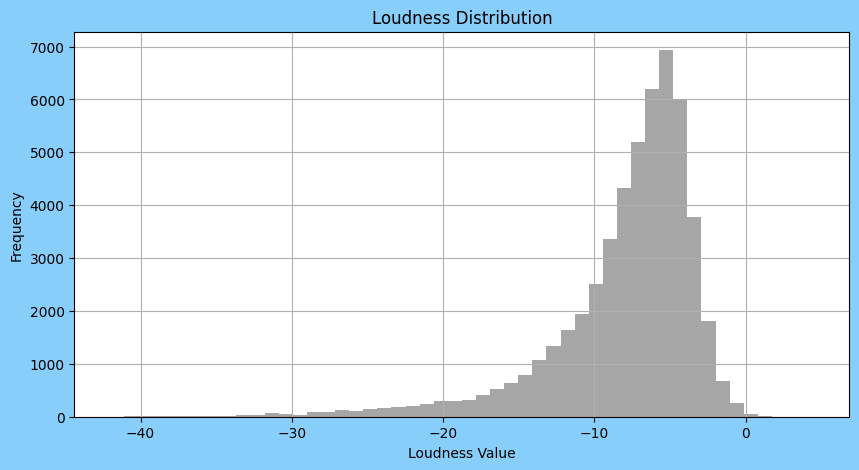

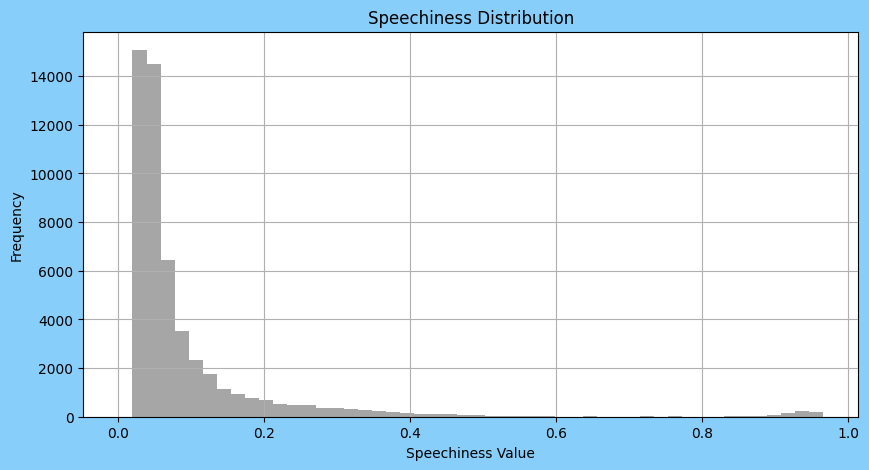

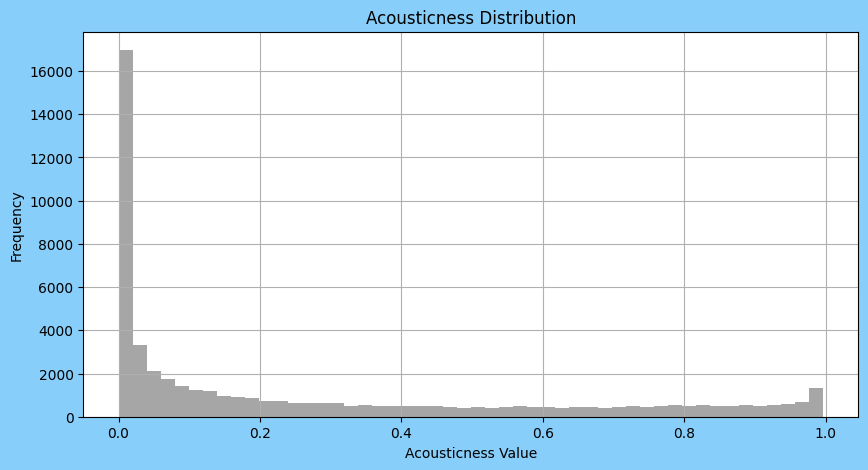

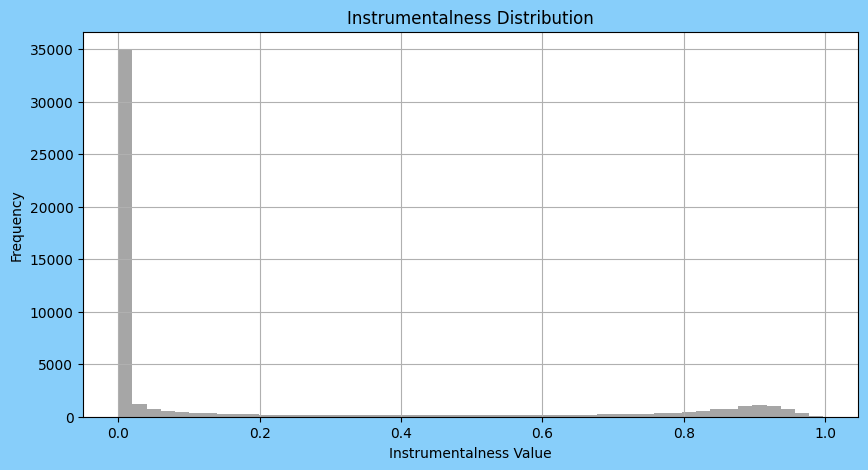

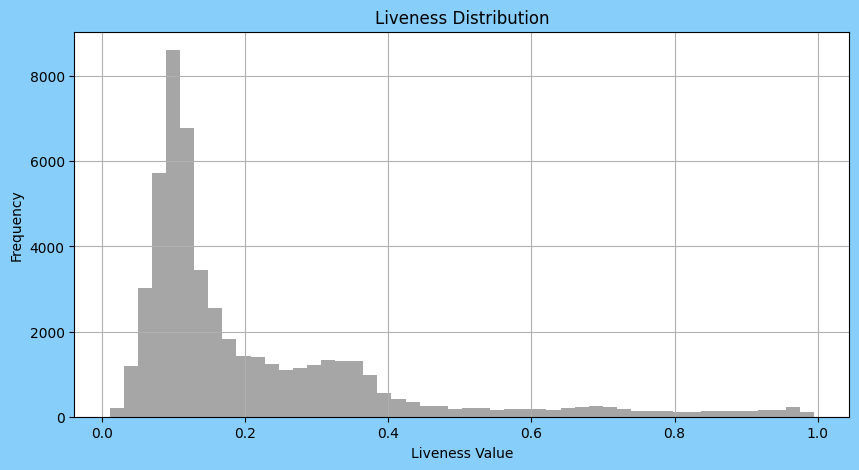

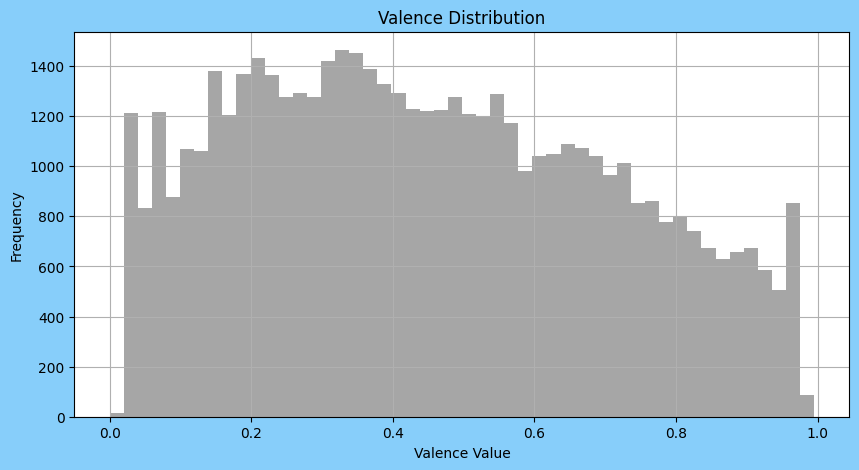

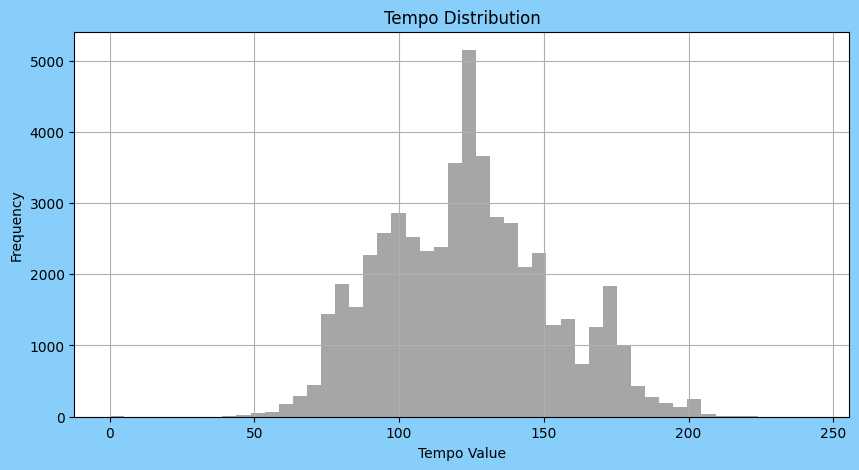

In [19]:
# Quesition 1)
#----------------
# Create a list of song attributes
attributes_columns = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

# Draw Histogram for each attribute to see which is distributed normally. 
for attribute in attributes_columns:
    plt.figure(figsize=(10, 5), facecolor='lightskyblue')

     # Plot a histogram of the column data
    plt.hist(data_df[attribute], bins=50, color='gray', alpha=0.7)  # Adjust bin size as needed
    plt.title(f'{attribute.capitalize()} Distribution')  # Set the title of the plot
    plt.xlabel(f'{attribute.capitalize()} Value')  # Set the x-label as attribute value
    plt.ylabel('Frequency')  # Set the y-label as frequency
    plt.grid(True)  # Enable the grid for better readability
    plt.show()  # Show the plot


# Based on the graphs. *Tempo* distribution is closest to Normal Distribution. 

Question 2

Correlation between Duration and Popularity:  -0.05465119593637639


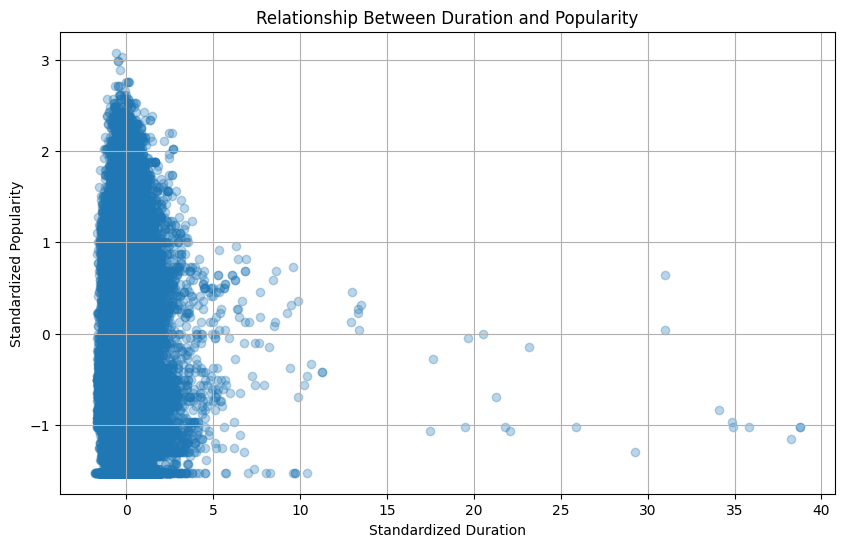

In [20]:
# Quesition 2)
#----------------

# Standardizing Duration(x-axis) and popularity(y-axis)----Standardized into z-score
standardized_duration = (data_df["duration"] - data_df["duration"].mean()) / data_df["duration"].std()
standardized_popularity = (data_df["popularity"] - data_df['popularity'].mean()) / data_df['popularity'].std()

print("Correlation between Duration and Popularity: ",standardized_duration.corr(standardized_popularity))

plt.figure(figsize=(10, 6)) 
plt.scatter(standardized_duration,standardized_popularity, alpha=0.3) #Make a scatter plot with circles as markers
plt.xlabel('Standardized Duration') #Suitable x-axis label
plt.ylabel('Standardized Popularity') #Suitable y-axis label
plt.title('Relationship Between Duration and Popularity') #Title: Here, we ask for 3 significant digits, 
plt.grid(True)
plt.show()

Question 3

5597
46403
Median of Popularity for TRUE:  34.0
Median of Popularity for FALSE:  33.0
U Statistics:  139361273.5
P-value:  1.5339599669557339e-19
Conclusion: Explicitly rated songs are more popular than songs that are not explicit.


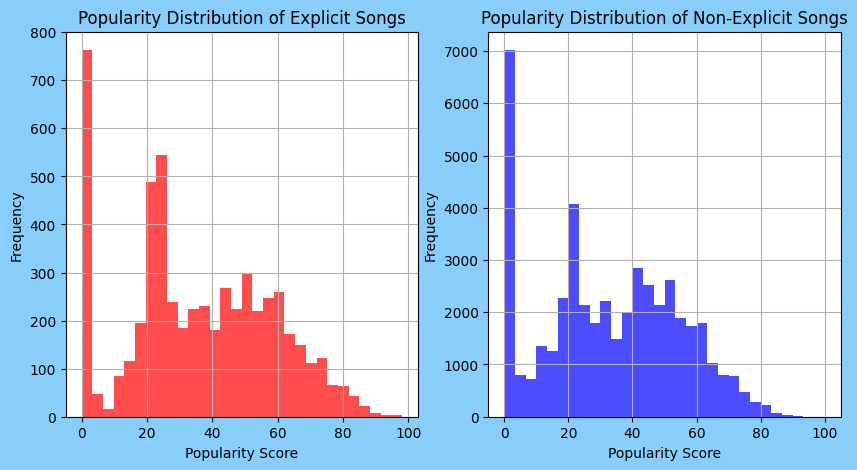

In [21]:
# Question 3)
# I used Mann Whitney U Test
#----------------
data_df['explicit']

# Create 2 groups of data based on their "explicit" labels. 
explicit_true_df = data_df[data_df['explicit'] == True]
explicit_false_df = data_df[data_df['explicit'] == False]

# Get the "popularity" of the 2 columns.
true_popularity = explicit_true_df['popularity']
false_popularity = explicit_false_df['popularity']
print(len(true_popularity))
print(len(false_popularity))

plt.figure(figsize=(10, 5), facecolor='lightskyblue')

# Visualize the "popularity" of both groups to see they are normally distributed. 
# Histogram for true_popularity
plt.subplot(1, 2, 1)  # First subplot in a 1x2 subplot grid
plt.hist(true_popularity, bins=30, color='red', alpha=0.7)  # Fewer bins for clearer visualization
plt.title('Popularity Distribution of Explicit Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for false_popularity
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 subplot grid
plt.hist(false_popularity, bins=30, color='blue', alpha=0.7)
plt.title('Popularity Distribution of Non-Explicit Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)

# Clearly, "popularity" are not normally distributed in both groups. We cannot reduce data to sample means. So we need non-parametric test 
# The Spotify popularity index is not categorical data but interval data and there are 2 groups. In this case, I choose Mann Whitney U Test

# Get the Median of the 2 groups
print("Median of Popularity for TRUE: ",true_popularity.median())
print("Median of Popularity for FALSE: ",false_popularity.median())

# Conduct Mann Whitney U Test
# H_0: There is *no* difference in 'popularity' between Explicit songs and Non-Explicit songs. 
# H_1: Explicitly rated songs are *more* popular than songs that are not explicit.
u1,p1 = stats.mannwhitneyu(true_popularity,false_popularity, alternative='greater')

print("U Statistics: ", u1)
print("P-value: ", p1)
# P-value is 1.5339599669557339e-19, much less than common significance level threshold alpha = 0.05.
# So the result is statistically significant assuming the null is true. 
# We drop the null hypothesis. 
# Conclusion: Explicitly rated songs are more popular than songs that are not explicit. 
print("Conclusion: Explicitly rated songs are more popular than songs that are not explicit.")


Question 4

Median of Popularity for Major Group:  32.0
Median of Popularity for Minor Group:  34.0
U Statistics:  309702373.0
P-value:  0.9999989912386331
Conclusion: Minor-key songs are more popular than major-key songs.
There is no evidence to suggest that major-key songs are more popular than minor-key songs,


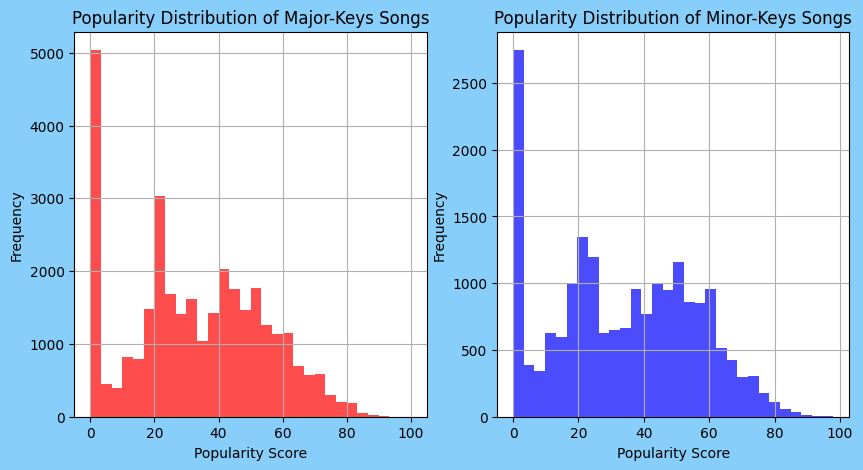

In [22]:
# Question 4)
# I used Mann Whitney U Test
#----------------

# Create 2 groups of data based on their "mode" labels. 
# 1 = song is in major, 0 – song is in minor
major_key_songs = data_df[data_df['mode'] == 1]
minor_key_songs = data_df[data_df['mode'] == 0]


# Get the "popularity" of the 2 columns.
major_popularity = major_key_songs['popularity']
minor_popularity = minor_key_songs['popularity']


plt.figure(figsize=(10, 5), facecolor='lightskyblue')

# Visualize the "popularity" of both groups to see they are normally distributed. 
# Histogram for major_popularity
plt.subplot(1, 2, 1)  # First subplot in a 1x2 subplot grid
plt.hist(major_popularity, bins=30, color='red', alpha=0.7)  # Fewer bins for clearer visualization
plt.title('Popularity Distribution of Major-Keys Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for minor_popularity
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 subplot grid
plt.hist(minor_popularity, bins=30, color='blue', alpha=0.7)
plt.title('Popularity Distribution of Minor-Keys Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)


# Clearly, "popularity" are not normally distributed in both groups. We cannot reduce data to sample means. So we need non-parametric test 
# The Spotify popularity index is not categorical data but interval data and there are 2 groups. In this case, I also 
#choose Mann Whitney U Test


# Get the Median of the 2 groups
print("Median of Popularity for Major Group: ",major_popularity.median())
print("Median of Popularity for Minor Group: ",minor_popularity.median())

# Conduct Mann Whitney U Test
# H_0: There is *no* difference in 'popularity' between major-key songs and minor-key songs. 
# H_1: Major-key songs are *more* popular than minor-key songs.
u2,p2 = stats.mannwhitneyu(major_popularity,minor_popularity,alternative='greater')

print("U Statistics: ", u2)
print("P-value: ", p2)
# P-value is 0.9999989912386331, greater than common significance level threshold alpha = 0.05.
# So the result is not statistically significant assuming the null is true. 
# We fail to drop the null hypothesis. 
# Conclusion: Minor-key songs are more popular than major-key songs.
print("Conclusion: Minor-key songs are more popular than major-key songs.")
print("There is no evidence to suggest that major-key songs are more popular than minor-key songs,")


Question 5

Correlation between Standardized Energy and Standardized Loudness: 0.7748808291850194


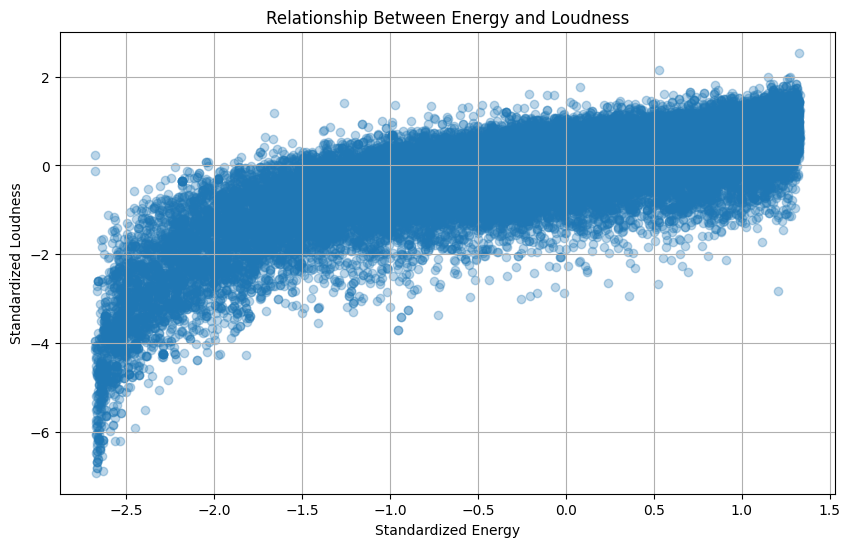

In [23]:
# Quesition 5)
#----------------

# Standardizing Energy(x-axis) and Loudness(y-axis)----Standardized into z-score
standardized_energy = (data_df["energy"] - data_df["energy"].mean()) / data_df["energy"].std()
standardized_loudness = (data_df["loudness"] - data_df['loudness'].mean()) / data_df['loudness'].std()

data = {
    'Standardized Energy': standardized_energy,
    'Standardized Loudness': standardized_loudness
}
# Create a DataFrame from the dictionary
standardized_df = pd.DataFrame(data)

# Calculate the correlation between the two columns
correlation = standardized_df['Standardized Energy'].corr(standardized_df['Standardized Loudness'])

print("Correlation between Standardized Energy and Standardized Loudness:", correlation)

plt.figure(figsize=(10, 6)) 
plt.scatter(standardized_energy,standardized_loudness, alpha=0.3) #Make a scatter plot with circles as markers
plt.xlabel('Standardized Energy') #Suitable x-axis label
plt.ylabel('Standardized Loudness') #Suitable y-axis label
plt.title('Relationship Between Energy and Loudness') #Title: Here, we ask for 3 significant digits, 
plt.grid(True)
plt.show()

# Based on the scatterplot and correlation coefficient, 'energy' does reflect 'loudness' of a song. The 2 variables are postively 
# correlated. The higher 'energy' is, the higher 'loudness' becames. 

Question 6

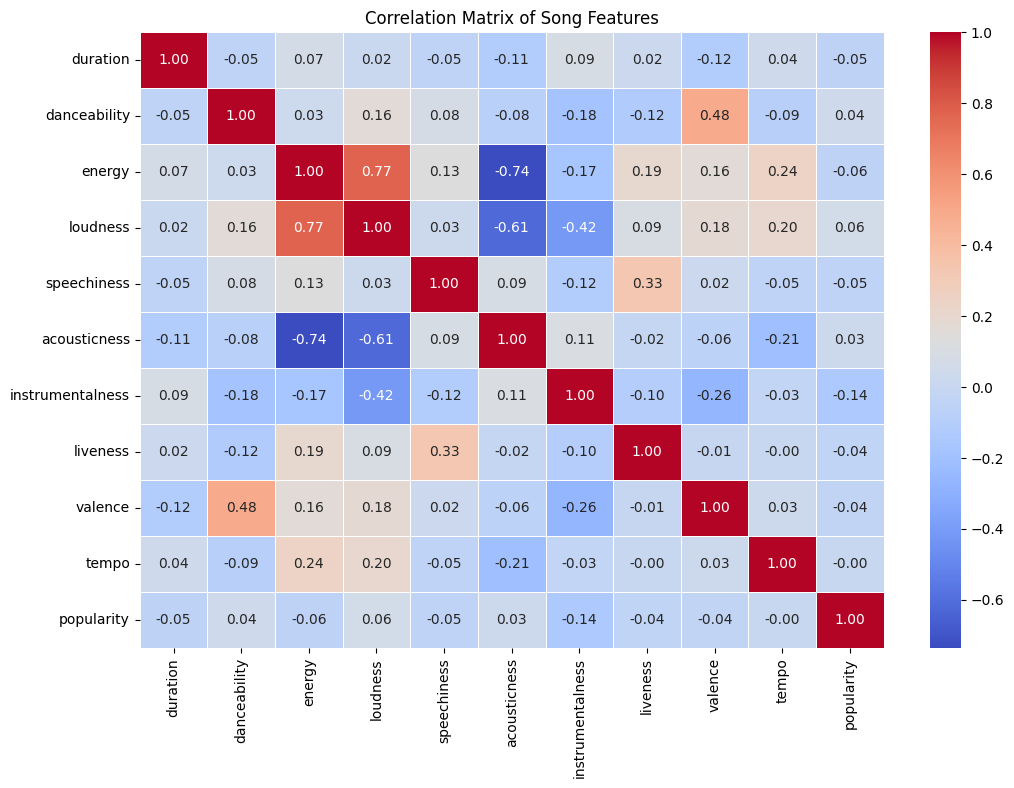

duration correlation:  -0.05465119593637639
danceability correlation:  0.03715781135740385
energy correlation:  -0.05592469066526966
loudness correlation:  0.06021003481482001
speechiness correlation:  -0.048532677084213646
acousticness correlation:  0.026233391738937687
instrumentalness correlation:  -0.1449722705373328
liveness correlation:  -0.043846029909762836
valence correlation:  -0.03576878910256893
tempo correlation:  -0.0026318311756676578


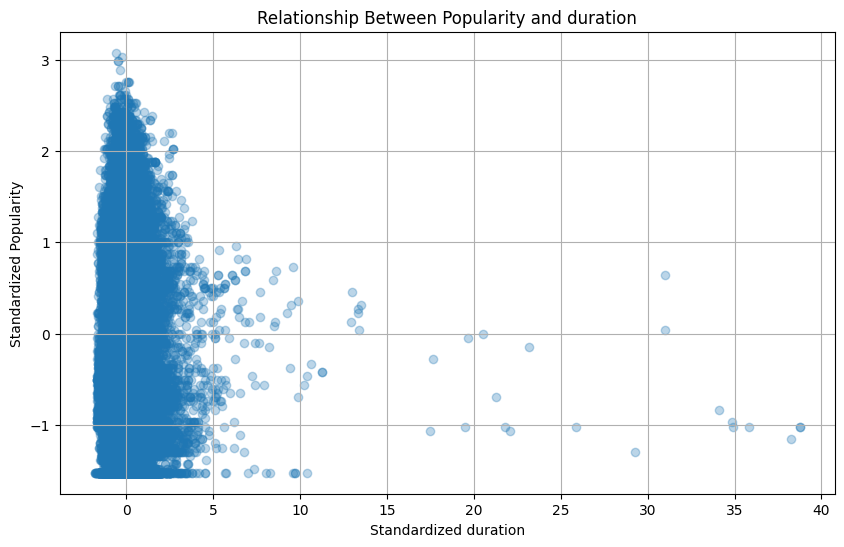

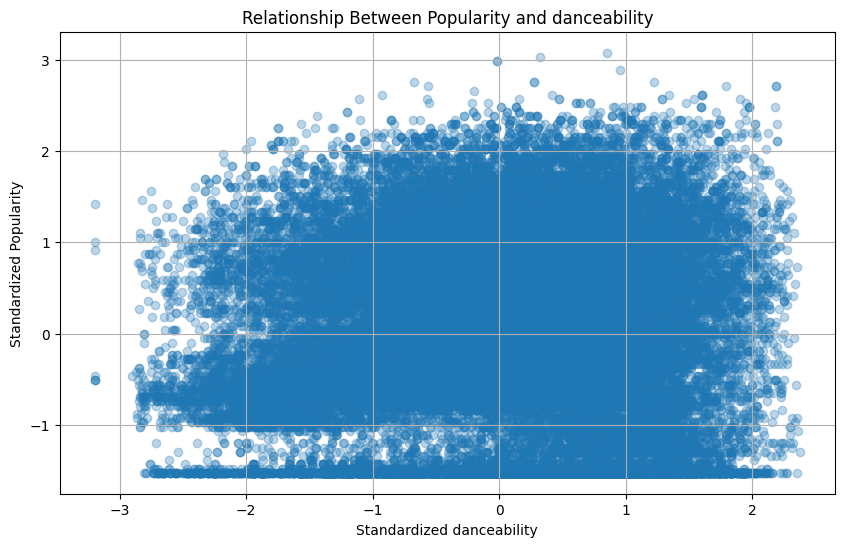

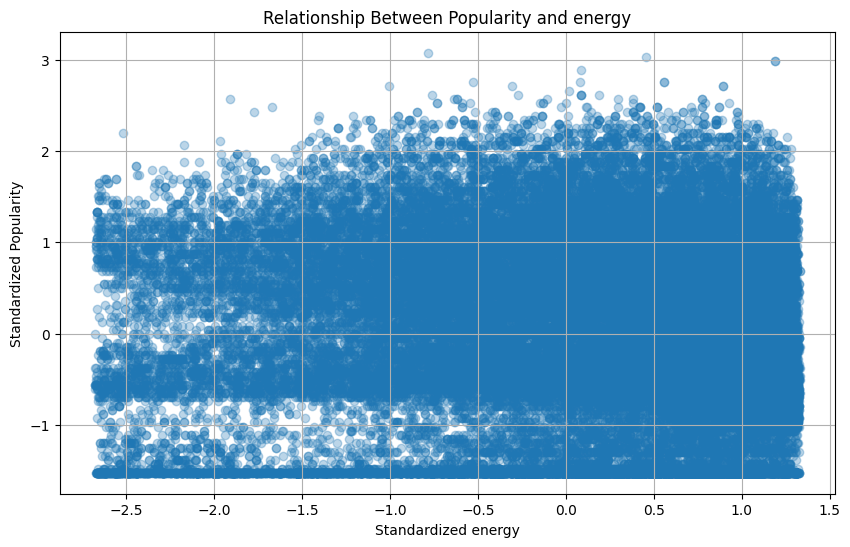

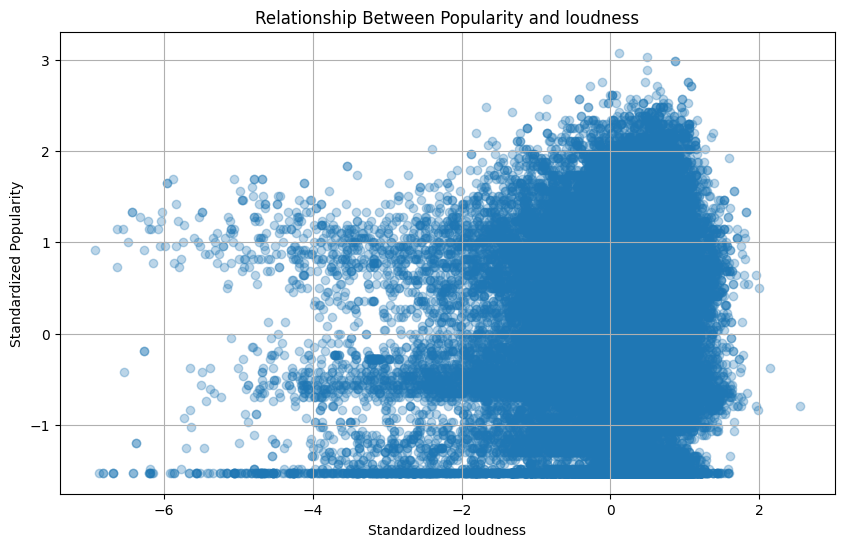

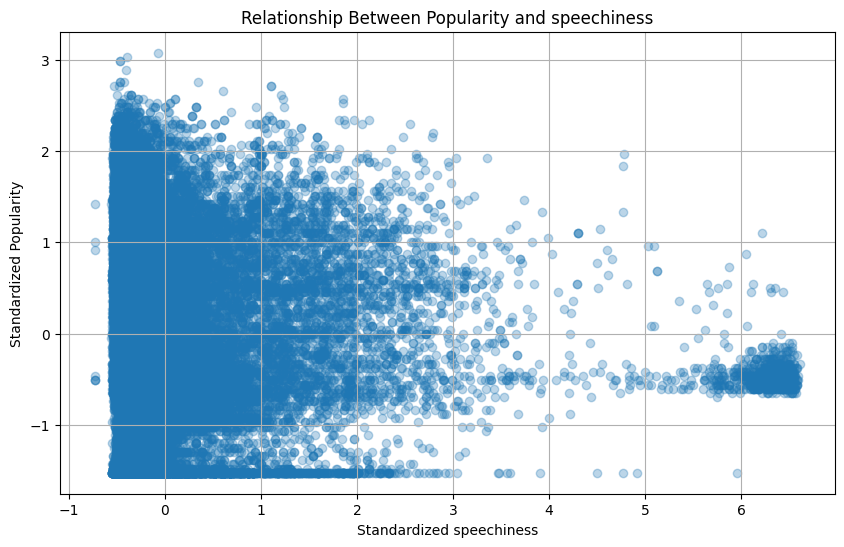

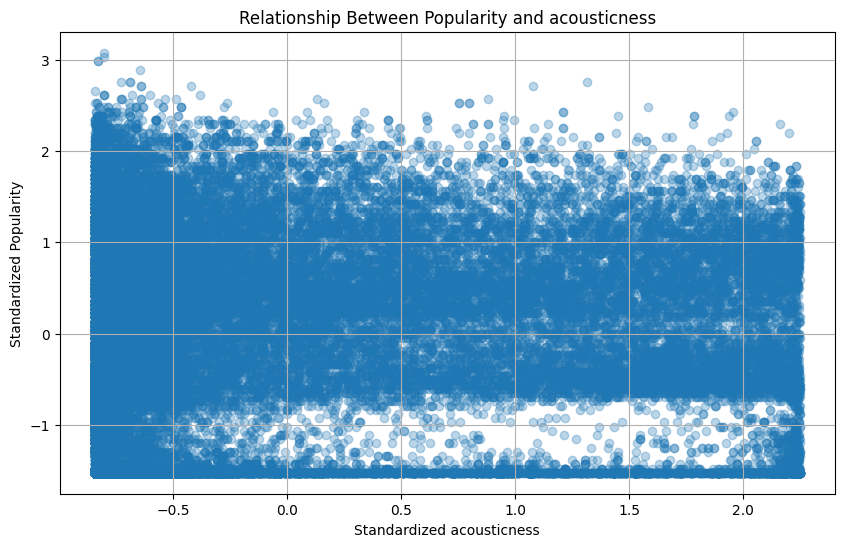

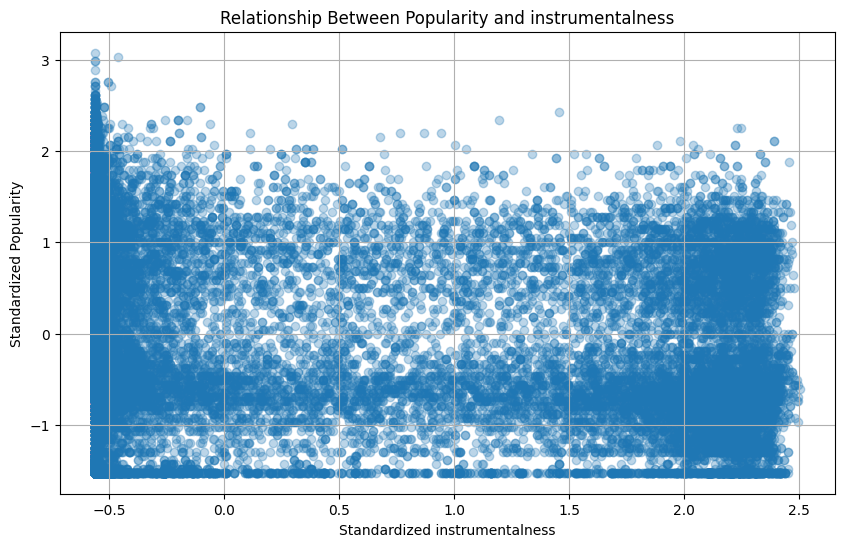

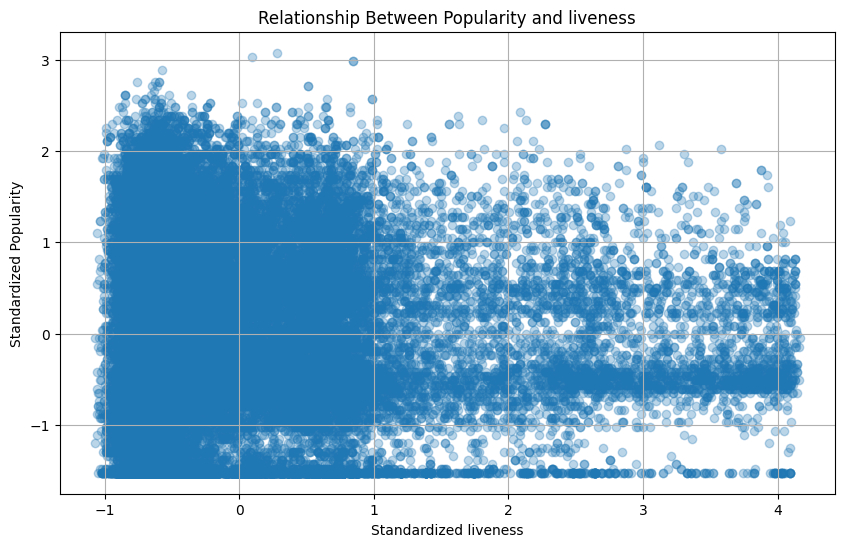

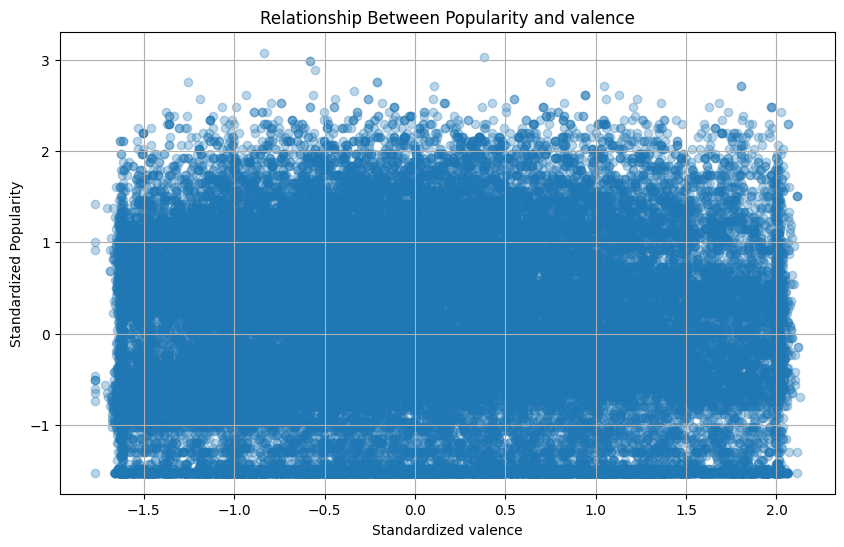

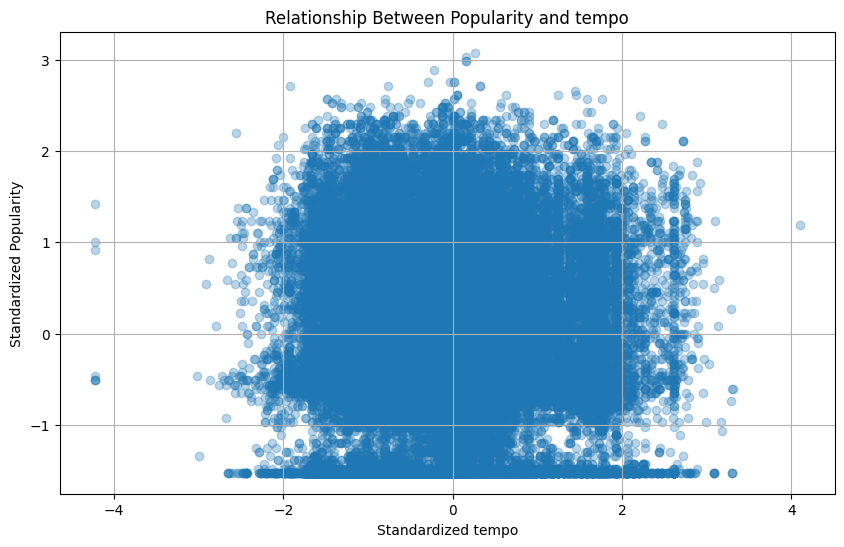

In [24]:
# Quesition 6)
# Exploratory Data Analysis (Correlation)
#----------------

# All 10 attributes
attributes_columns = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

# Standardizing all columns ----Standardized into z-score
# Dictionary to hold standardized columns
standardized_data = {}
for column in attributes_columns:
    standardized_data[column] = (data_df[column] - data_df[column].mean()) / data_df[column].std()

standardized_data['popularity'] = (data_df['popularity'] - data_df['popularity'].mean()) / data_df['popularity'].std()
# Create a DataFrame from the dictionary of standardized columns
standardized_df = pd.DataFrame(standardized_data)

# Calculating the correlation matrix
corr_matrix = standardized_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 8))

# Drawing a heatmap with the numeric values in each cell
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, linewidths=0.5)

plt.title('Correlation Matrix of Song Features')
plt.show()

# create a list for correlations
correlation_list_10 = []
for column in attributes_columns:
    correlation = standardized_df['popularity'].corr(standardized_df[column])
    print(column, "correlation: ", correlation)
    correlation_list_10.append(correlation)




for column in attributes_columns:
    plt.figure(figsize=(10, 6)) 
    plt.scatter(standardized_df[column], standardized_df['popularity'], alpha=0.3) #Make a scatter plot with circles as markers
    plt.xlabel('Standardized ' + column ) #Suitable x-axis label
    plt.ylabel('Standardized Popularity') #Suitable y-axis label
    plt.title('Relationship Between Popularity and ' + column) #Title: Here, we ask for 3 significant digits, 
    plt.grid(True)
    plt.show()



In [25]:
# Question 6)
# Building simple linear regression
#----------------

# Single Feature Linear Regression
# Find the best feature
results = {}
for column in attributes_columns:
    X = standardized_df[[column]]
    y = standardized_df['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10058032)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    results[column] = {'R2': r2, 'RMSE': rmse}
    print(column)
    print( "R-suared:",r2)
    print("Root Mean Squared Error:", rmse)
    print("----------")

# Find the feature with the best R^2 and lowest RMSE
best_feature = max(results, key=lambda x: results[x]['R2'])

print()
print(f'Best single feature: {best_feature} with R2: {results[best_feature]["R2"]} and RMSE: {results[best_feature]["RMSE"]}')


duration
R-suared: 0.003513339375693425
Root Mean Squared Error: 0.9932084217239865
----------
danceability
R-suared: 0.0015089972821005215
Root Mean Squared Error: 0.9942067940498664
----------
energy
R-suared: 0.0029483619392279836
Root Mean Squared Error: 0.9934899412140813
----------
loudness
R-suared: 0.00410290413175507
Root Mean Squared Error: 0.9929145656492276
----------
speechiness
R-suared: 0.0036787895418751715
Root Mean Squared Error: 0.9931259653668604
----------
acousticness
R-suared: 0.0004889246006493098
Root Mean Squared Error: 0.9947145123462185
----------
instrumentalness
R-suared: 0.024834252203008056
Root Mean Squared Error: 0.9825255843538242
----------
liveness
R-suared: 0.003542342968189227
Root Mean Squared Error: 0.9931939675305292
----------
valence
R-suared: 0.0007414359745734345
Root Mean Squared Error: 0.9945888546119708
----------
tempo
R-suared: 8.779679496973003e-06
Root Mean Squared Error: 0.9949534040345769
----------

Best single feature: instrument

Question 7

In [26]:
# Question 7)
# Building multiple linear regression
#----------------

X = standardized_df[attributes_columns]
y = standardized_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10058032)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
overall_r2 = r2_score(y_test, y_pred)
overall_rmse = root_mean_squared_error(y_test, y_pred)
feature_importance = model.coef_

print(f'Overall model R2: {overall_r2} and RMSE: {overall_rmse}')
print(f'Feature importances: {dict(zip(attributes_columns, feature_importance))}')
# Find the feature with greatest importance-----Energy
print("Most important feature is Energy: ",max(abs(feature_importance)))

Overall model R2: 0.053536229699158056 and RMSE: 0.9679582948331364
Feature importances: {'duration': -0.04359887308425386, 'danceability': 0.04151127670891615, 'energy': -0.1610866259201247, 'loudness': 0.1522880016841278, 'speechiness': -0.04310884152131449, 'acousticness': 0.014898785362135668, 'instrumentalness': -0.1265134411965063, 'liveness': -0.01609475236532121, 'valence': -0.09523172673428318, 'tempo': 0.013312894265545529}
Most important feature is Energy:  0.1610866259201247


In [27]:
# Question 7)
# Building Lasso regression
#----------------


X = data_df[attributes_columns]  # features
y = data_df['popularity']         # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10058032)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model
lasso.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred) # R-squared
rmse = root_mean_squared_error(y_test, y_pred) # Root Mean Squared Error

print(f'Lasso R²: {r2:.2f}')
print(f'Lasso RMSE: {rmse:.2f}')
print(f'Lasso Coefficients: {lasso.coef_}')


Lasso R²: 0.05
Lasso RMSE: 21.05
Lasso Coefficients: [-0.85166859  0.72411268 -3.26796164  2.9293376  -0.82745434  0.12824851
 -2.7109007  -0.31015866 -1.84418572  0.14526953]


In [28]:
# Question 7)
# Building Elastic Net
#----------------
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000, random_state=10058032)
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)

coefficients = elastic_net.coef_

# Get Elastic Net coefficients
print("Elastic Net Coefficients:", coefficients)
r2 = r2_score(y_test, y_pred) # R-squared
print("R²:",r2)
# Mean Squared Error + Root Mean Squared Error 
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("Elastic Net Mean Squared Error:", mse)
print("Elastic Net Root Mean Squared Error:", rmse)


Elastic Net Coefficients: [-0.35636943  0.10877283 -0.82466873  0.54244536 -0.36520009  0.
 -1.76429977 -0.18687543 -0.55075985  0.        ]
R²: 0.03230213517665814
Elastic Net Mean Squared Error: 452.9141021300478
Elastic Net Root Mean Squared Error: 21.281778641129783


Question 8

27.339
16.174
13.846
9.796
8.752
8.148
6.783
4.716
3.131
1.316


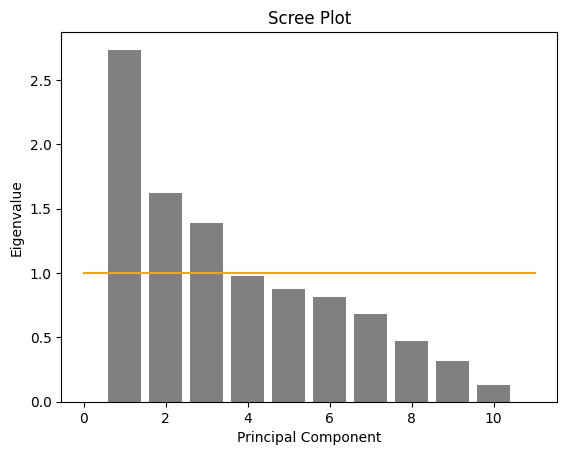

Number of factors extracted by Kaiser criterion: 3
Number of factors extracted by elbow criterion: 1
Number of factors to account for at least 90% variance: 7
Conclusion: 
The first three components are considered meaningful based on the Kaiser Criterion,explaining approximately 57.359% of the variance.
To cover at least 90% of the variance, 7 components are required, as derived from the cumulative variance.


In [29]:
# Question 8)
# Principal Components Analysis
#----------------

# All 10 attributes
attributes_columns = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

pca = PCA().fit(standardized_df[attributes_columns]) #Actually create the PCA object
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(standardized_df[attributes_columns])
varExplained = eigVals/sum(eigVals)*100
# Now let's display this for each factor:
for ii in range(len(varExplained)):
    print(varExplained[ii].round(3))




numComponents = len(eigVals)
x = np.arange(1, numComponents + 1)
# Plotting the bar chart for eigenvalues
plt.bar(x, eigVals, color='gray')
plt.plot([0, numComponents + 1], [1, 1], color='orange')  # Kaiser criterion line
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


# Access scree plot using 3 criterion: 1. Kaiser criterion line 2. elbow criterion 3.90% variance explained
kaiserThreshold = 1
print('Number of factors extracted by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors extracted by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 #90% is a commonly used threshold
eigSum = np.cumsum(varExplained) #Cumulative sum of the explained variance 
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)


# Conclusions based on Output
print("Conclusion: ")
print('The first three components are considered meaningful based on the Kaiser Criterion,'
        'explaining approximately 57.359% of the variance.')
print('To cover at least 90% of the variance, 7 components are required, as derived from the cumulative variance.')


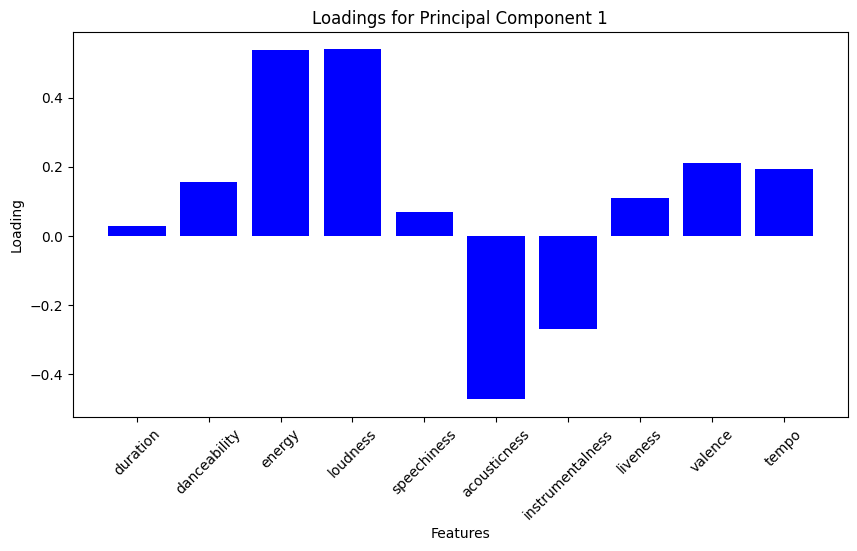

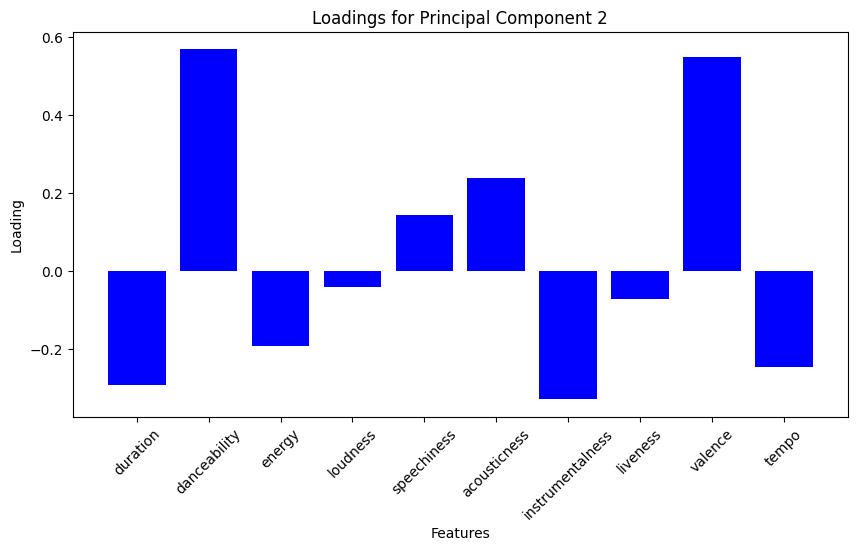

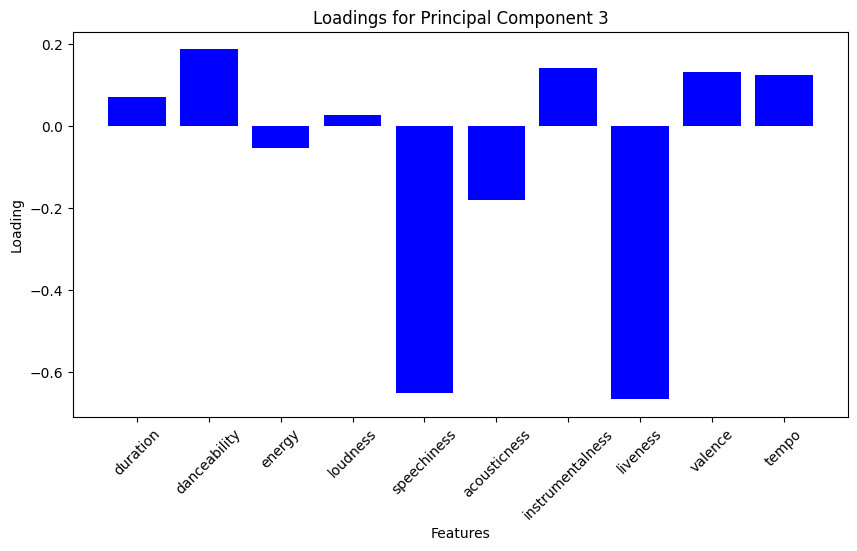

In [30]:
# Plotting loadings for a selected principal component
whichPrincipalComponent = [0,1,2]  # Python indexing (0 for the first component) 0,1,2
for i in whichPrincipalComponent:
    plt.figure(figsize=(10, 5))
    loading_scores = pca.components_[i]
    plt.bar(attributes_columns, loading_scores*-1, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Loading')
    plt.title(f'Loadings for Principal Component {i + 1}')
    plt.xticks(rotation=45)  # Rotate feature names for better visibility
    plt.show()


Question 9

In [31]:
# Question 9)
# Logistic Regression
# --------------------
X = data_df[['valence']]
y = data_df['mode']

# Splitting data into training and testing sets
X_train_valence, X_test_valance, y_train_mode, y_test_mode = train_test_split(X, y, test_size=0.2, random_state=10058032)

model_valance = LogisticRegression()
model_valance.fit(X_train_valence, y_train_mode)
probabilities_valence = model_valance.predict_proba(X_test_valance)[:, 1]

# Predicting and evaluating the model
predictions_mode = model_valance.predict(X_test_valance)
print(model_valance.coef_)
print(model_valance.intercept_)
print(classification_report(y_test_mode, predictions_mode))
print("AUC-ROC for valence-mode Model:", roc_auc_score(y_test_mode, probabilities_valence))



[[0.13078091]]
[0.44570527]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400

AUC-ROC for valence-mode Model: 0.4995568203947721


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

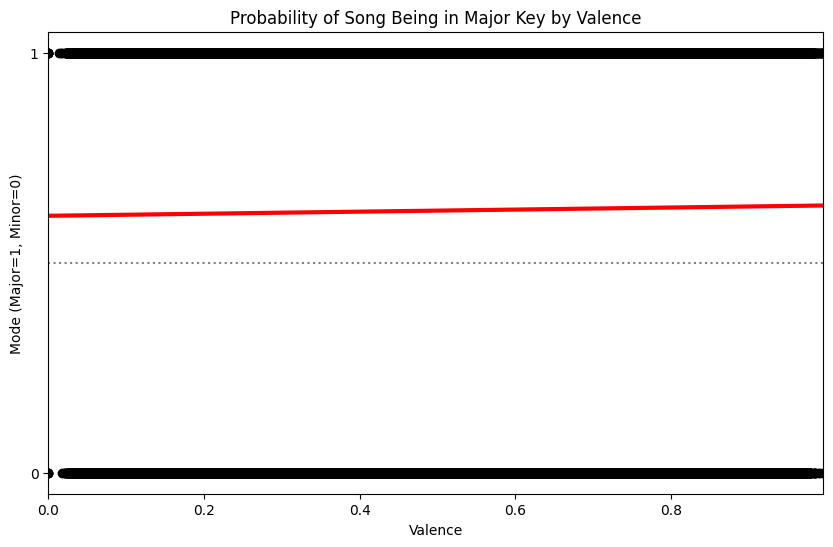

Conclusion: Valence is not a good predictor of Mode


In [32]:
# Question 9)
# Logistic Regression
# --------------------
X = data_df[['valence']]
y = data_df['mode']

model_valance = LogisticRegression()
model_valance.fit(X, y)

# Generating data for the sigmoid plot
x1 = np.linspace(X['valence'].min(), X['valence'].max(), 500)
y1 = model_valance.coef_[0][0] * x1 + model_valance.intercept_[0]
sigmoid = expit(y1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x1, sigmoid, color='red', linewidth=3)
plt.scatter(data_df['valence'], data_df['mode'], color='black') 
plt.hlines(0.5, X['valence'].min(), X['valence'].max(), colors='gray', linestyles='dotted')
plt.xlabel('Valence')
plt.xlim([X['valence'].min(), X['valence'].max()])
plt.ylabel('Mode (Major=1, Minor=0)')
plt.yticks([0, 1])
plt.title('Probability of Song Being in Major Key by Valence')
plt.show()

print('Conclusion: Valence is not a good predictor of Mode')

In [33]:
# Looking for a better predictor 
potential_features = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

best_auc = 0
best_feature = None

for feature in potential_features:
    X = data_df[[feature]]
    y = data_df['mode']
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10058032)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probabilities)
    
    if auc > best_auc:
        best_auc = auc
        best_feature = feature

    print(f"Feature: {feature}")
    print(classification_report(y_test, predictions))
    print(f"AUC-ROC for {feature} Model:", auc)

# Best feature
print(f"Best Feature: {best_feature} with AUC-ROC: {best_auc}")

Feature: duration
              precision    recall  f1-score   support

           0       0.46      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                           0.62     10400
   macro avg       0.54      0.50      0.38     10400
weighted avg       0.56      0.62      0.48     10400

AUC-ROC for duration Model: 0.5185317180974178
Feature: danceability
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400

AUC-ROC for danceability Model: 0.5528057528088618
Feature: energy
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Feature: loudness
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400

AUC-ROC for loudness Model: 0.525836173732529
Feature: speechiness
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400

AUC-ROC for speechiness Model: 0.5546255762365291
Feature: acousticness
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3949
           1       0.62      1.00      0.77      6451

    accuracy             

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Question 10

In [34]:
# Question 10) 
# Better predictor of whether a song is classical music
# ---------------------------------

# Find all genres in the column
unique_genres = data_df['track_genre'].unique()
print(unique_genres)


# Create a new column: classical=1, everything else = 0
data_df['genre_classical'] = np.where(data_df['track_genre'].str.contains('classical', case=False, na=False), 1, 0)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop']


In [35]:
# Logistic Regression for 'duration'
# --------------------
X_duration = data_df[['duration']]
y = data_df['genre_classical']

# Splitting data into training and testing sets
X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_duration, y, test_size=0.2, random_state=10058032)

model_duration = LogisticRegression()
model_duration.fit(X_train_dur, y_train_dur)

# Predictions and Probability
predictions_dur = model_duration.predict(X_test_dur)
probabilities_dur = model_duration.predict_proba(X_test_dur)[:, 1]

print("Evaluation for Duration Model:")
print('--------------------------------------------')
print("Duration Model Coefficients:", model_duration.coef_)
print("Duration Model Intercept:", model_duration.intercept_)
print("Classification Report for Duration Model:")
print(classification_report(y_test_dur, predictions_dur))
# Predict probabilities
print("AUC-ROC for Duration Model:", roc_auc_score(y_test_dur, probabilities_dur))
print("Confusion Matrix for Duration Model:", confusion_matrix(y_test_dur,predictions_dur))


Evaluation for Duration Model:
--------------------------------------------
Duration Model Coefficients: [[1.94714035e-07]]
Duration Model Intercept: [-3.97818447]
Classification Report for Duration Model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10199
           1       0.00      0.00      0.00       201

    accuracy                           0.98     10400
   macro avg       0.49      0.50      0.50     10400
weighted avg       0.96      0.98      0.97     10400

AUC-ROC for Duration Model: 0.4274138670311547
Confusion Matrix for Duration Model: [[10199     0]
 [  201     0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [36]:
# Logistic Regression for principle components 
# --------------------
pca = PCA(n_components=3)
principal_components = pca.fit_transform(standardized_df[attributes_columns])
y = data_df['genre_classical']

# Splitting data into training and testing sets
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(principal_components, y, test_size=0.2, random_state=10058032)

# Fits the model with training set
model_pc = LogisticRegression()
model_pc.fit(X_train_pc, y_train_pc)

# Predictions and Probability
predictions_pc = model_pc.predict(X_test_pc)
probabilities_pc = model_pc.predict_proba(X_test_pc)[:, 1]

# Model Report.
print("Evaluation for Principal Component Model:")
print('--------------------------------------------')
print("Duration Model Coefficients:", model_pc.coef_)
print("Duration Model Intercept:", model_pc.intercept_)
print("Classification Report for Principal Component Model:\n", classification_report(y_test_pc, predictions_pc))
print("AUC-ROC for Principal Component Model:", roc_auc_score(y_test_pc, probabilities_pc))
print("Confusion Matrix for Duration Model:", confusion_matrix(y_test_pc,predictions_pc))


Evaluation for Principal Component Model:
--------------------------------------------
Duration Model Coefficients: [[ 0.92358399 -0.25108309  0.03978084]]
Duration Model Intercept: [-5.60044599]
Classification Report for Principal Component Model:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10199
           1       0.33      0.07      0.11       201

    accuracy                           0.98     10400
   macro avg       0.65      0.53      0.55     10400
weighted avg       0.97      0.98      0.97     10400

AUC-ROC for Principal Component Model: 0.9443819240887434
Confusion Matrix for Duration Model: [[10170    29]
 [  187    14]]


In [37]:
# Avoid overfitting with cross-validation methods
cv_duration = StratifiedKFold(n_splits=5, shuffle=True, random_state=10058032)
cv_scores_duration = cross_val_score(model_duration, data_df[['duration']], y, cv=cv_duration, scoring='roc_auc')

cv_pc = StratifiedKFold(n_splits=5, shuffle=True, random_state=10058032)
cv_scores_pc = cross_val_score(model_pc, principal_components, y, cv=cv_pc, scoring='roc_auc')

print("Cross-Validation AUC-ROC Scores for Duration Model:", cv_scores_duration)
print("Average AUC-ROC for Duration Model:", cv_scores_duration.mean())
print("\nCross-Validation AUC-ROC Scores for Principal Components Model:", cv_scores_pc)
print("Average AUC-ROC for Principal Components Model:", cv_scores_pc.mean())

Cross-Validation AUC-ROC Scores for Duration Model: [0.41692819 0.45319142 0.37724387 0.41152206 0.43747794]
Average AUC-ROC for Duration Model: 0.4192726960784313

Cross-Validation AUC-ROC Scores for Principal Components Model: [0.94538971 0.94685956 0.93497696 0.94937672 0.94968235]
Average AUC-ROC for Principal Components Model: 0.9452570588235293


# Extra Credit Part: something about time_signiture
# ------------------------------------------------------

In [38]:

# Calculate the mode (most common value) of the time signatures for each genre
common_time_signature = data_df.groupby('track_genre')['time_signature'].agg(lambda x: x.mode().iat[0])

print("Most common time signature for each genre:\n", common_time_signature)



Most common time signature for each genre:
 track_genre
acoustic          4
afrobeat          4
alt-rock          4
alternative       4
ambient           4
anime             4
black-metal       4
bluegrass         4
blues             4
brazil            4
breakbeat         4
british           4
cantopop          4
chicago-house     4
children          4
chill             4
classical         4
club              4
comedy            4
country           4
dance             4
dancehall         4
death-metal       4
deep-house        4
detroit-techno    4
disco             4
disney            4
drum-and-bass     4
dub               4
dubstep           4
edm               4
electro           4
electronic        4
emo               4
folk              4
forro             4
french            4
funk              4
garage            4
german            4
gospel            4
goth              4
grindcore         4
groove            4
grunge            4
guitar            4
happy             4
hard

In [39]:
# Find genres with uncommon time signatures (e.g., not 4/4 or 3/4)
uncommon_time_signatures = data_df[~data_df['time_signature'].isin([3, 4])]
uncommon_by_genre = uncommon_time_signatures.groupby('track_genre')['time_signature'].unique()

print("Genres with uncommon time signatures:\n", uncommon_by_genre)

Genres with uncommon time signatures:
 track_genre
acoustic             [1, 5]
afrobeat             [5, 1]
alt-rock          [5, 1, 0]
alternative          [5, 1]
ambient           [5, 1, 0]
anime                [5, 1]
black-metal          [5, 1]
bluegrass            [5, 1]
blues                [5, 1]
brazil               [5, 1]
breakbeat            [5, 1]
british              [1, 5]
cantopop             [1, 5]
children             [1, 5]
chill                [5, 1]
classical            [5, 1]
club                 [5, 1]
comedy               [5, 1]
country              [5, 1]
dance                   [5]
dancehall            [5, 1]
death-metal          [1, 5]
deep-house              [1]
detroit-techno       [5, 1]
disco                [5, 1]
disney            [5, 1, 0]
drum-and-bass        [5, 1]
dub                  [5, 1]
dubstep              [5, 1]
edm                     [1]
electro              [1, 5]
electronic           [1, 5]
emo                  [5, 1]
folk                 [1, 

In [40]:
# Calculate the standard deviation of time signatures for each genre
time_signature_variability = data_df.groupby('track_genre')['time_signature'].std()

print("Variability of time signature for each genre:\n", time_signature_variability)


Variability of time signature for each genre:
 track_genre
acoustic          0.426564
afrobeat          0.327401
alt-rock          0.281706
alternative       0.301209
ambient           0.767581
anime             0.356649
black-metal       0.539736
bluegrass         0.351002
blues             0.376295
brazil            0.315040
breakbeat         0.170023
british           0.471706
cantopop          0.293261
chicago-house     0.108940
children          0.421043
chill             0.336120
classical         0.740829
club              0.360390
comedy            0.866343
country           0.344019
dance             0.137732
dancehall         0.370693
death-metal       0.451640
deep-house        0.166649
detroit-techno    0.229843
disco             0.243331
disney            0.571569
drum-and-bass     0.192323
dub               0.229372
dubstep           0.272237
edm               0.153947
electro           0.237934
electronic        0.250533
emo               0.289072
folk              0.617

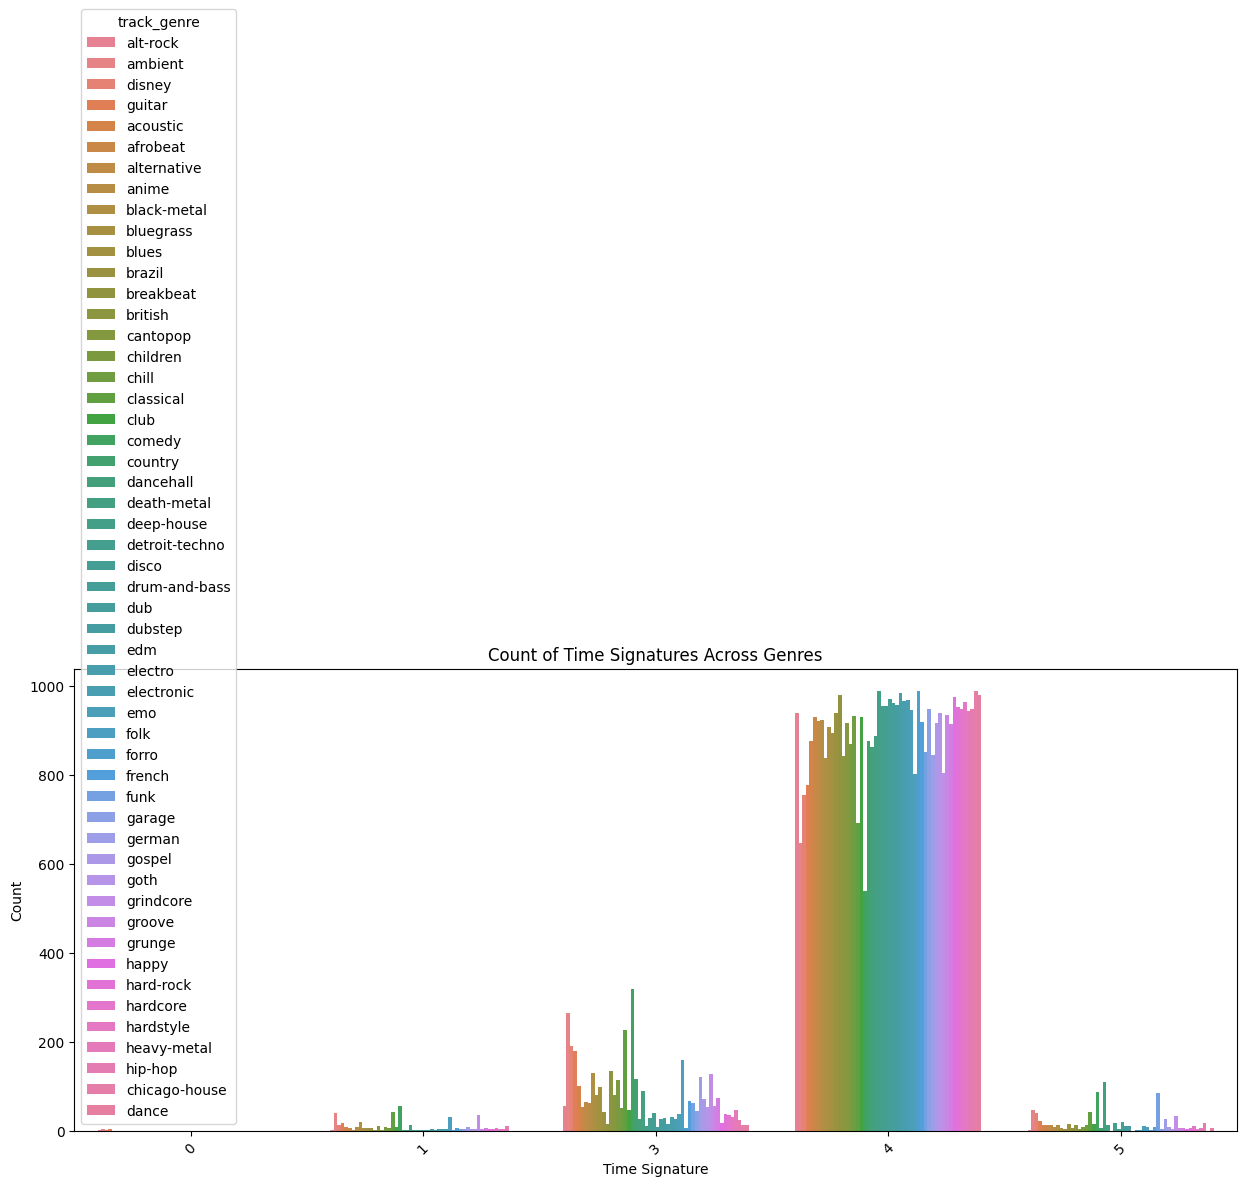

In [41]:

plt.figure(figsize=(15, 6))
sns.countplot(data=data_df, x='time_signature', hue='track_genre')
plt.title('Count of Time Signatures Across Genres')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
